# Cleaning Modes With Rational Filters

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as pl
import numpy as np
import qnm_filter
import qnm
from gwpy.timeseries import TimeSeries
import copy
from scipy.special import logsumexp
import astropy.constants as c

In [3]:
data = 

In [4]:
[med_snr, med_bayes, std_bayes] = data

Text(1.25, 1.25, 'Slope = 1.991 $\\pm$ 0.004')

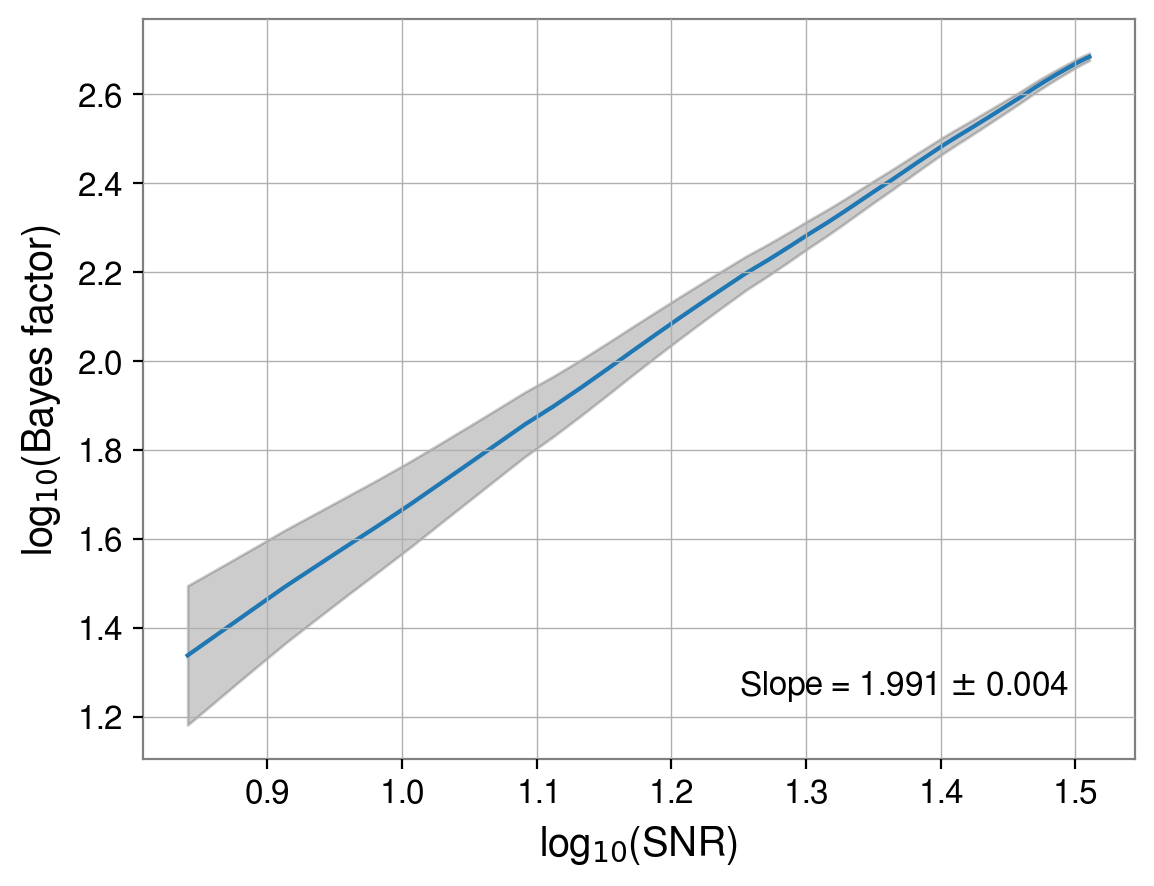

In [5]:
pl.plot(med_snr,med_bayes)
pl.fill_between(med_snr, 
                med_bayes-std_bayes, med_bayes+std_bayes,
               alpha = 0.2, color = 'k')
pl.xlabel("log$_{10}$(SNR)")
pl.ylabel("log$_{10}$(Bayes factor)")
pl.text(1.25, 1.25, 'Slope = 1.991 $\pm$ 0.004')

In [6]:
# Fix integrated version - make sure resolution is good enough 
# increase sample size and wide enough parameter space
# Randomise mass and spin

In [10]:
raw_data = np.loadtxt('./results/rawData_snrPoints=50_realisations=50_lowres.txt')

/tmp/ipykernel_27328/3638924176.py:1: UserWarning: loadtxt: input contained no data: "./results/rawData_snrPoints=50_realisations=50_lowres.txt"
  raw_data = np.loadtxt('./results/rawData_snrPoints=50_realisations=50_lowres.txt')


In [7]:
np.polyfit(med_snr, med_bayes, deg=1, cov = True)

(array([ 2.01694057, -0.34640634]),
 array([[ 2.23737116e-05, -2.83544913e-05],
        [-2.83544913e-05,  3.68269047e-05]]))

In [11]:
np.log10(0.5)

-0.3010299956639812

In [8]:
2.23737116e-05**0.5

0.004730085792033797